# Tesla Stocks EDA

In [1]:
import pandas as pd                         # type: ignore
import yfinance as yf                       # type: ignore
import matplotlib.pyplot as plt             # type: ignore
%matplotlib inline

from datetime import datetime as dt

## load data

In [2]:
df_tesla = yf.download('TSLA') # type: ignore
len(df_tesla), df_tesla.columns

[*********************100%%**********************]  1 of 1 completed


(3543,
 Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object'))

In [3]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-07-22,244.210007,253.210007,243.750000,251.509995,251.509995,101225400
2024-07-23,253.600006,255.759995,245.630005,246.380005,246.380005,111928200
2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900


In [4]:
type(df_tesla) # type: ignore

pandas.core.frame.DataFrame

In [5]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3543 entries, 2010-06-29 to 2024-07-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3543 non-null   float64
 1   High       3543 non-null   float64
 2   Low        3543 non-null   float64
 3   Close      3543 non-null   float64
 4   Adj Close  3543 non-null   float64
 5   Volume     3543 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 193.8 KB


## index & data retrival

In [6]:
df_tesla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2024-07-15', '2024-07-16', '2024-07-17', '2024-07-18',
               '2024-07-19', '2024-07-22', '2024-07-23', '2024-07-24',
               '2024-07-25', '2024-07-26'],
              dtype='datetime64[ns]', name='Date', length=3543, freq=None)

In [7]:
idx = df_tesla.loc['2020-01-01': '2021-09-01'].index
idx

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

In [8]:
share_open = df_tesla.loc['2020-01-01': '2021-09-01']['Open']
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

## plots

<Axes: xlabel='Date'>

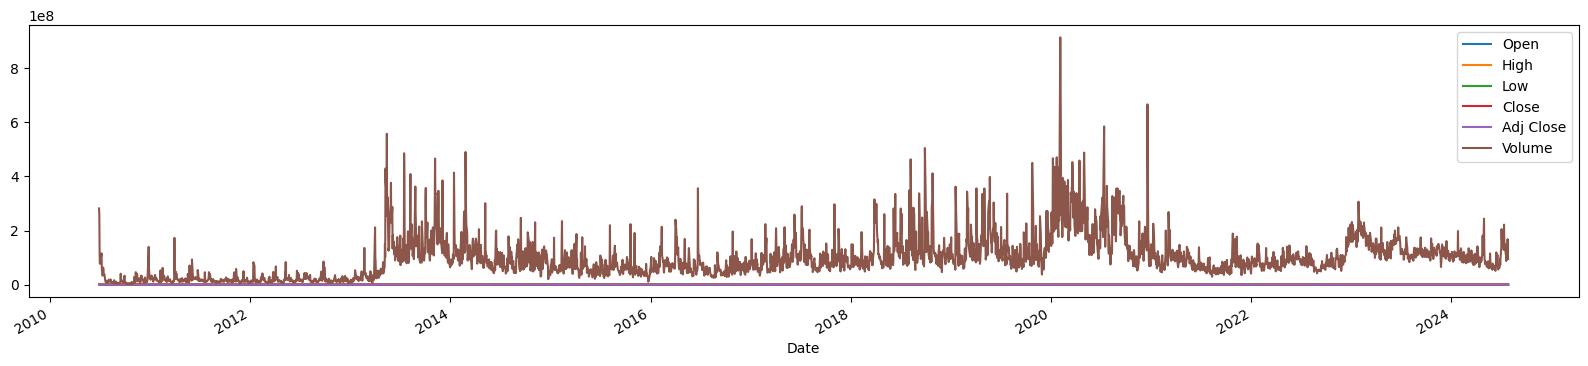

In [9]:
df_tesla.plot(figsize=(20, 4))

<Axes: xlabel='Date'>

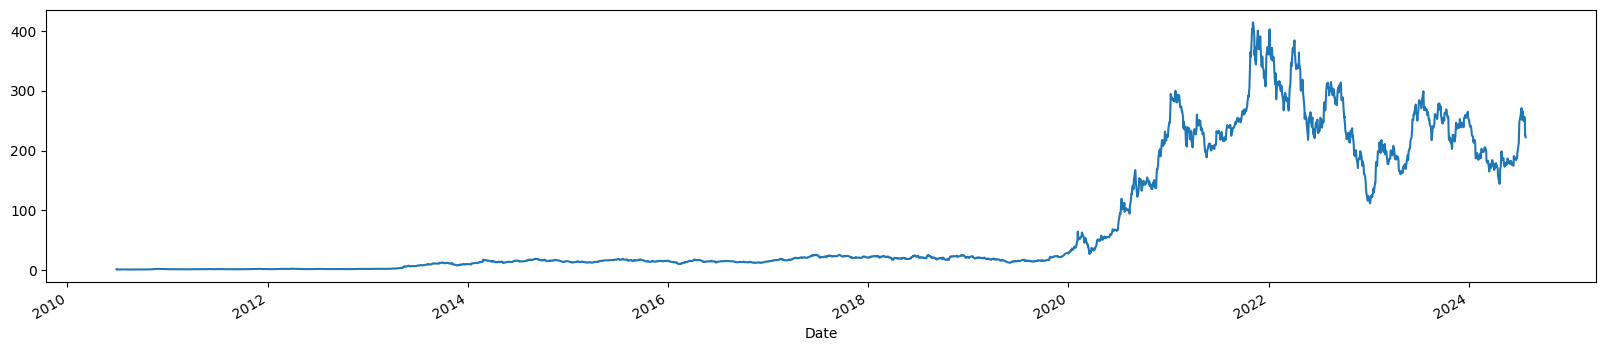

In [10]:
df_tesla['High'].plot(figsize=(20, 4))

<Axes: xlabel='Date'>

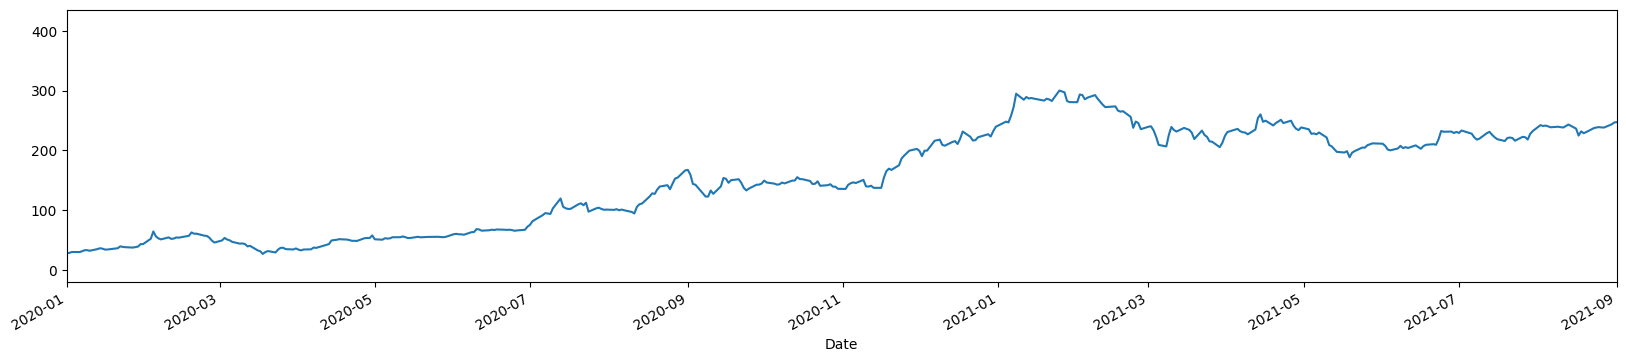

In [11]:
# xlimit and ylimit - so, can see the graph clearly
df_tesla['High'].plot(xlim=['2020-01-01', '2021-09-01'], figsize=(20, 4))

<Axes: xlabel='Date'>

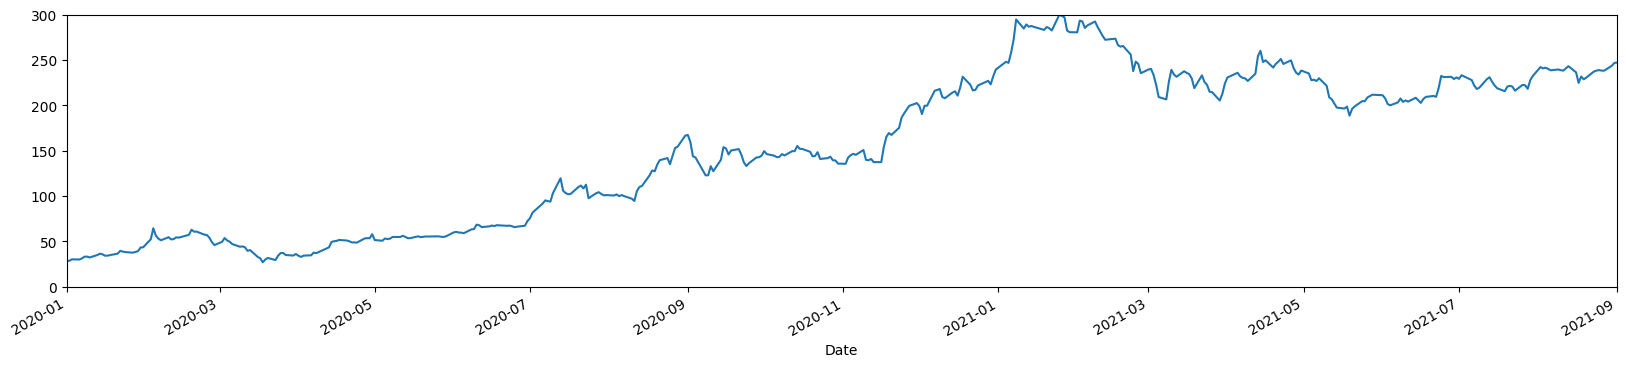

In [12]:
df_tesla['High'].plot(xlim=['2020-01-01', '2021-09-01'], ylim=[0, 300], figsize=(20, 4))

<Axes: xlabel='Date'>

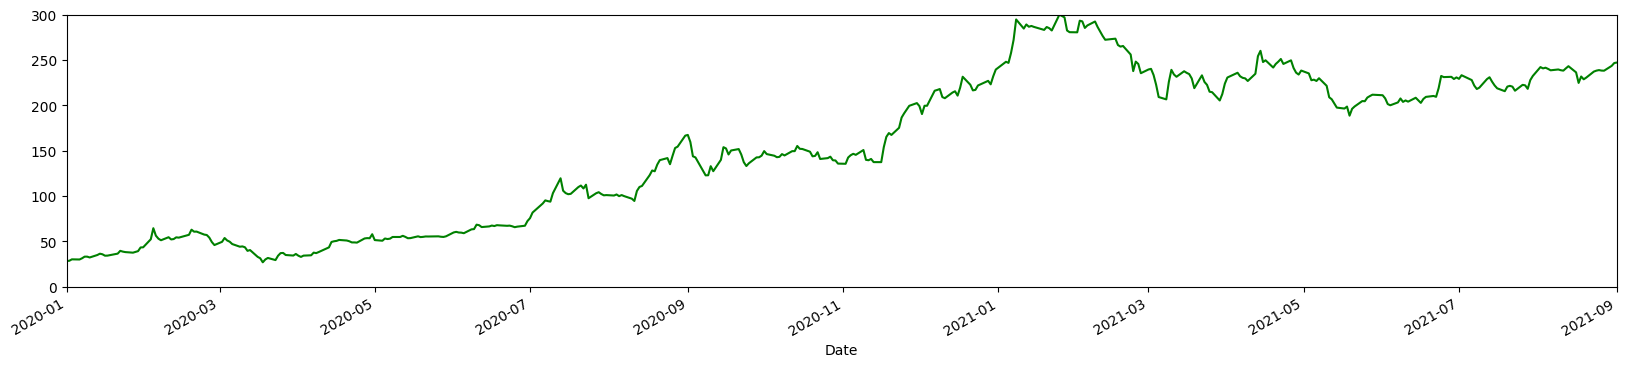

In [13]:
# apply colouring
df_tesla['High'].plot(xlim=['2020-01-01', '2021-09-01'], ylim=[0, 300], figsize=(20, 4), c='green')

<Axes: xlabel='Date'>

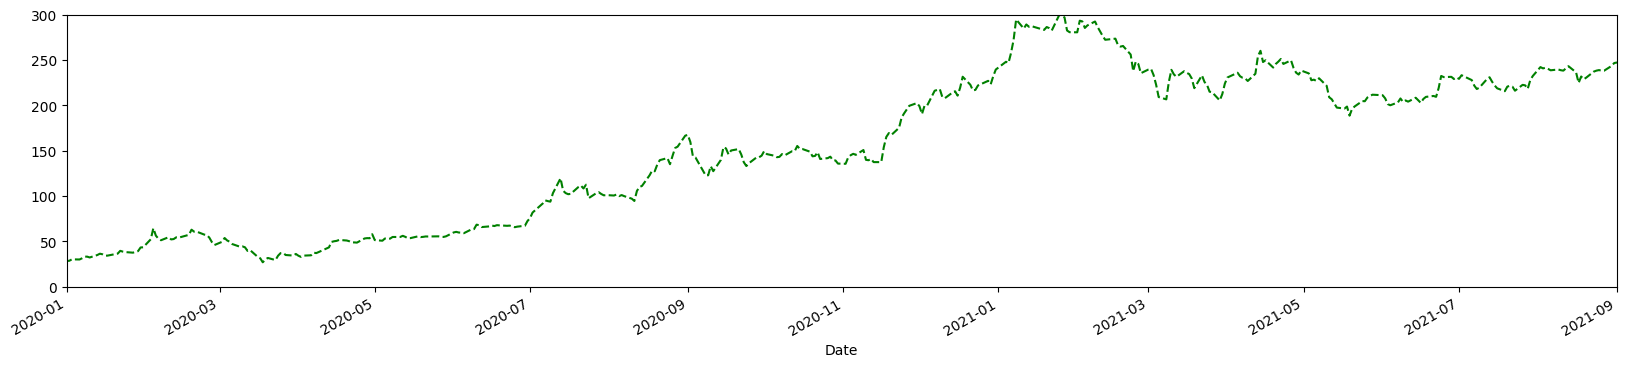

In [14]:
# add doted lines
df_tesla['High'].plot(xlim=['2020-01-01', '2021-09-01'], ylim=[0, 300], figsize=(20, 4), ls='--', c='green')

## sub plots

In [15]:
idx = df_tesla.loc['2020-01-01': '2021-09-01'].index
share_open = df_tesla.loc['2020-01-01': '2021-09-01']['Open']

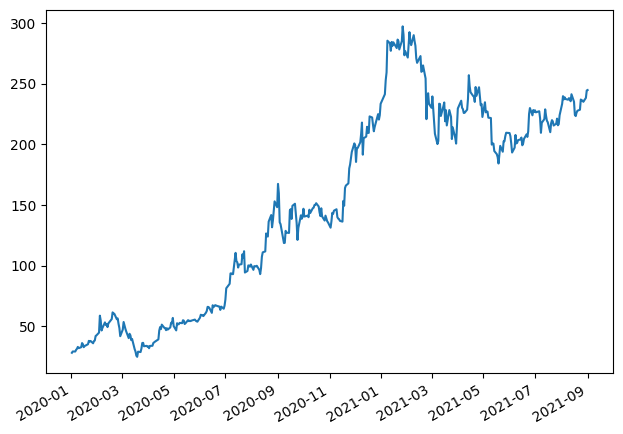

In [16]:
figure, axis = plt.subplots()
plt.tight_layout()

# preventing x-axis labels overlapping
figure.autofmt_xdate()

axis.plot(idx, share_open) # type: ignore

## time resampling

In [17]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


### year end frequency

In [18]:
df_tesla.resample(rule='A')

/tmp/ipykernel_422422/2858902996.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_tesla.resample(rule='A')


In [19]:
df_tesla.resample(rule='A').min()

/tmp/ipykernel_422422/2338822268.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_tesla.resample(rule='A').min()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,1.076000,1.108667,0.998667,1.053333,1.053333,1777500
2011-12-31,1.452000,1.484667,1.407333,1.455333,1.455333,3594000
2012-12-31,1.774667,1.790000,1.509333,1.519333,1.519333,5473500
2013-12-31,2.205333,2.225333,2.140667,2.194000,2.194000,6603000
2014-12-31,9.366667,9.800000,9.111333,9.289333,9.289333,19983000
2015-12-31,12.388667,12.619333,12.093333,12.333333,12.333333,10620000
2016-12-31,9.488000,10.331333,9.403333,9.578000,9.578000,24892500
2017-12-31,14.316667,14.688667,14.064000,14.466000,14.466000,32800500
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500


In [20]:
# A or YE means year end frequency
df_tesla.resample(rule='A').max()

/tmp/ipykernel_422422/2218573616.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_tesla.resample(rule='A').max()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-31,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-31,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


/tmp/ipykernel_422422/3335937191.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_tesla.resample(rule='A').max()['Open'].plot(figsize=(20, 4))


<Axes: xlabel='Date'>

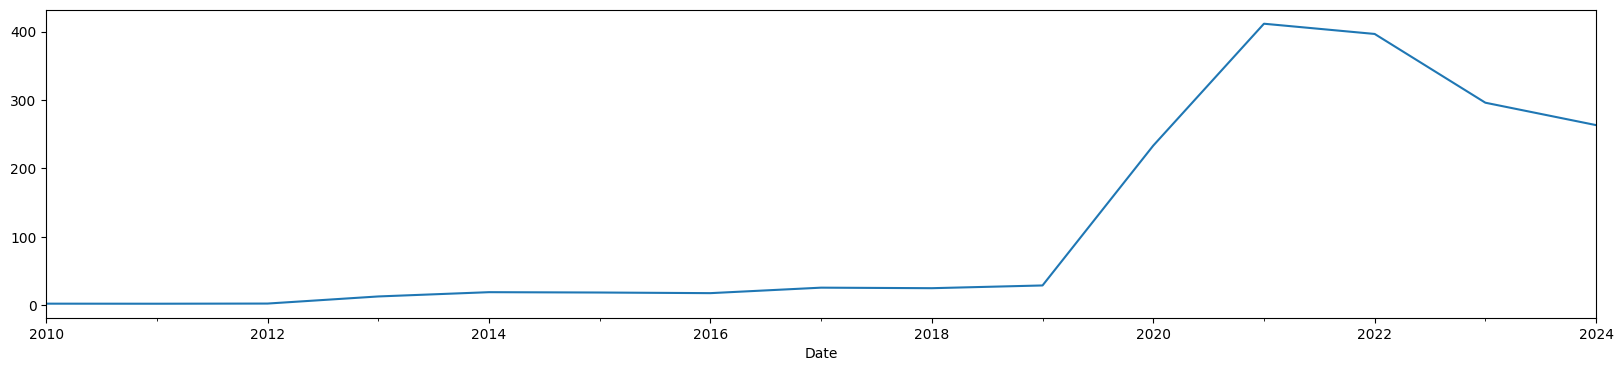

In [21]:
# A or YE means year end frequency
df_tesla.resample(rule='A').max()['Open'].plot(figsize=(20, 4))

### quarterly start frequency

In [22]:
# quarterly start frequency
df_tesla.resample(rule='QS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-01,1.719333,2.028000,1.553333,1.592667,1.592667,281494500
2010-07-01,1.666667,1.728000,1.408667,1.465333,1.465333,123282000
2010-10-01,2.391333,2.428000,2.316667,2.364667,2.364667,139528500
2011-01-01,1.906000,1.914000,1.870000,1.896667,1.896667,172767000
2011-04-01,2.006667,2.100000,1.970000,2.009333,2.009333,93138000
2011-07-01,1.992667,2.029333,1.934000,1.982000,1.982000,45967500
2011-10-01,2.308667,2.333333,2.268667,2.329333,2.329333,58024500
2012-01-01,2.546000,2.663333,2.474000,2.529333,2.529333,82506000
2012-04-01,2.488667,2.564667,2.444667,2.534000,2.534000,83344500


<Axes: xlabel='Date'>

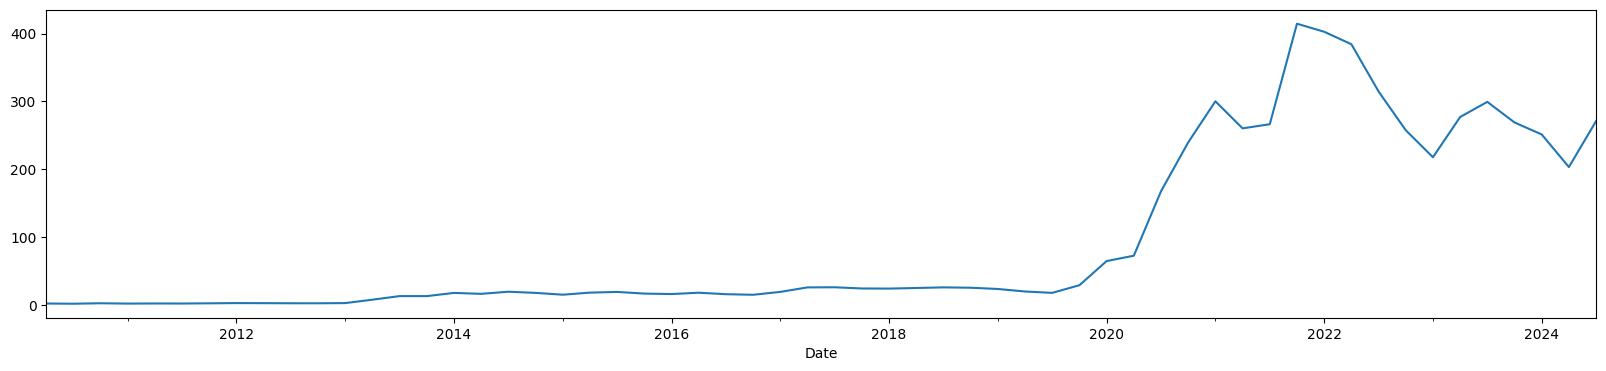

In [23]:
df_tesla.resample(rule='QS').max()['High'].plot(figsize=(20, 4))

### business end frequency

In [24]:
df_tesla.resample(rule='BA').max()['High']

/tmp/ipykernel_422422/4221446602.py:1: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  df_tesla.resample(rule='BA').max()['High']


Date
2010-12-31      2.428000
2011-12-30      2.333333
2012-12-31      2.663333
2013-12-31     12.966667
2014-12-31     19.427999
2015-12-31     19.110001
2016-12-30     17.955999
2017-12-29     25.974001
2018-12-31     25.830667
2019-12-31     29.020666
2020-12-31    239.573334
2021-12-31    414.496674
2022-12-30    402.666656
2023-12-29    299.290009
2024-12-31    271.000000
Freq: BYE-DEC, Name: High, dtype: float64

/tmp/ipykernel_422422/2430188389.py:2: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  df_tesla.resample(rule='BA').max()['High'].plot(figsize=(20, 4))


<Axes: xlabel='Date'>

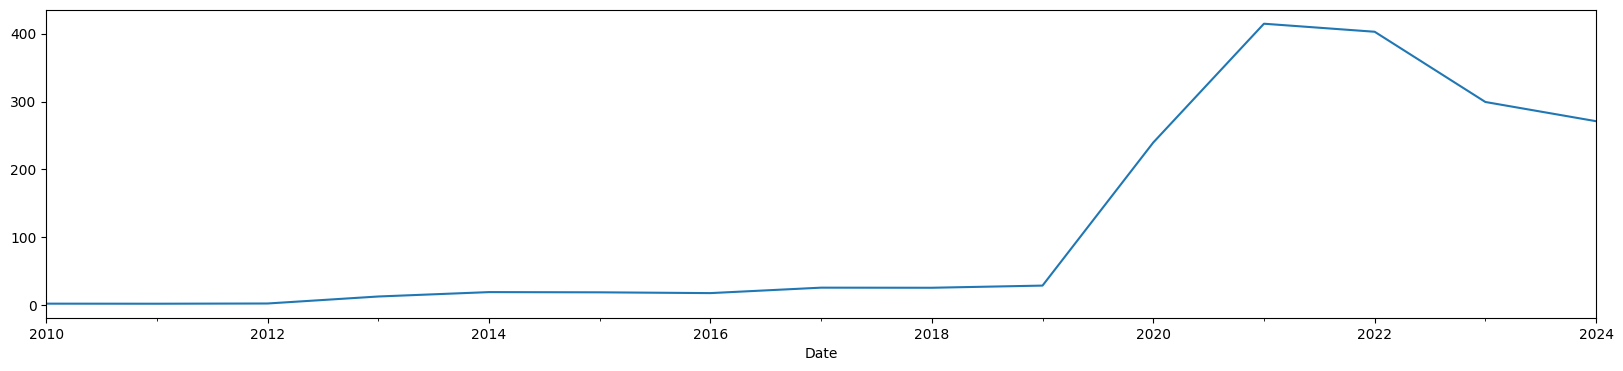

In [25]:
# business year end
df_tesla.resample(rule='BA').max()['High'].plot(figsize=(20, 4))

### ploting with resampling

/tmp/ipykernel_422422/3930442935.py:2: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  df_tesla['Open'].resample(rule='BA').mean().plot(kind='bar', figsize=(20, 4))


<Axes: xlabel='Date'>

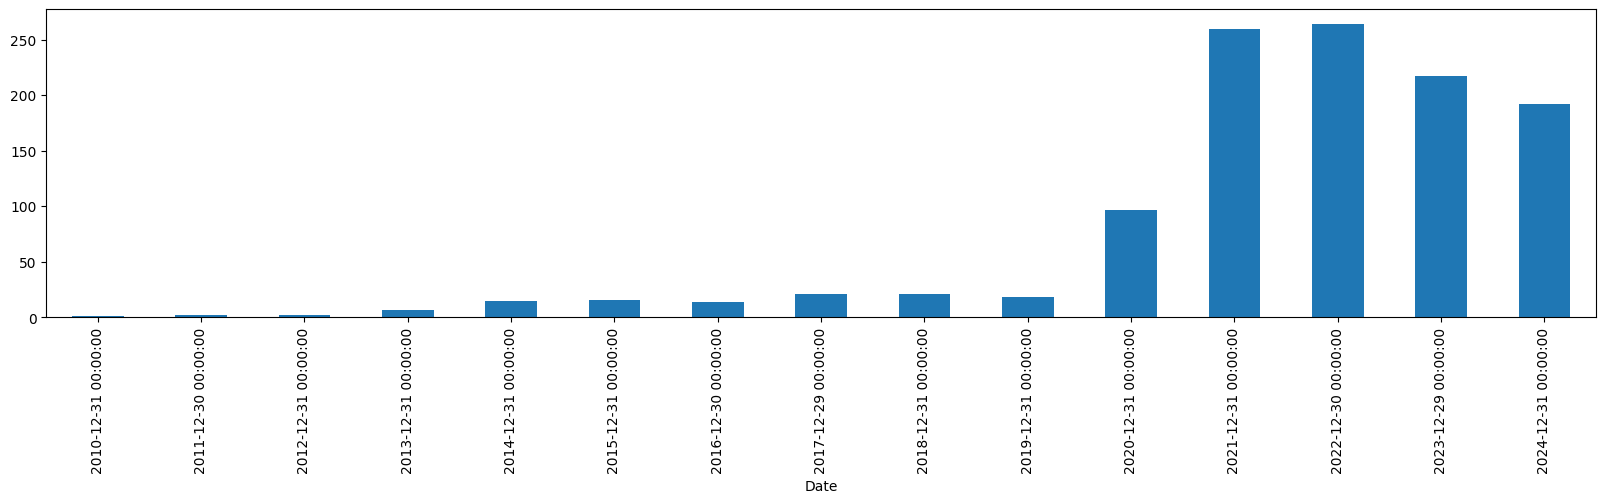

In [26]:
# business year end projection for Open
df_tesla['Open'].resample(rule='BA').mean().plot(kind='bar', figsize=(20, 4))

/tmp/ipykernel_422422/3727440799.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_tesla['Open'].resample(rule='M').max().plot(kind='bar', figsize=(30, 4))


<Axes: xlabel='Date'>

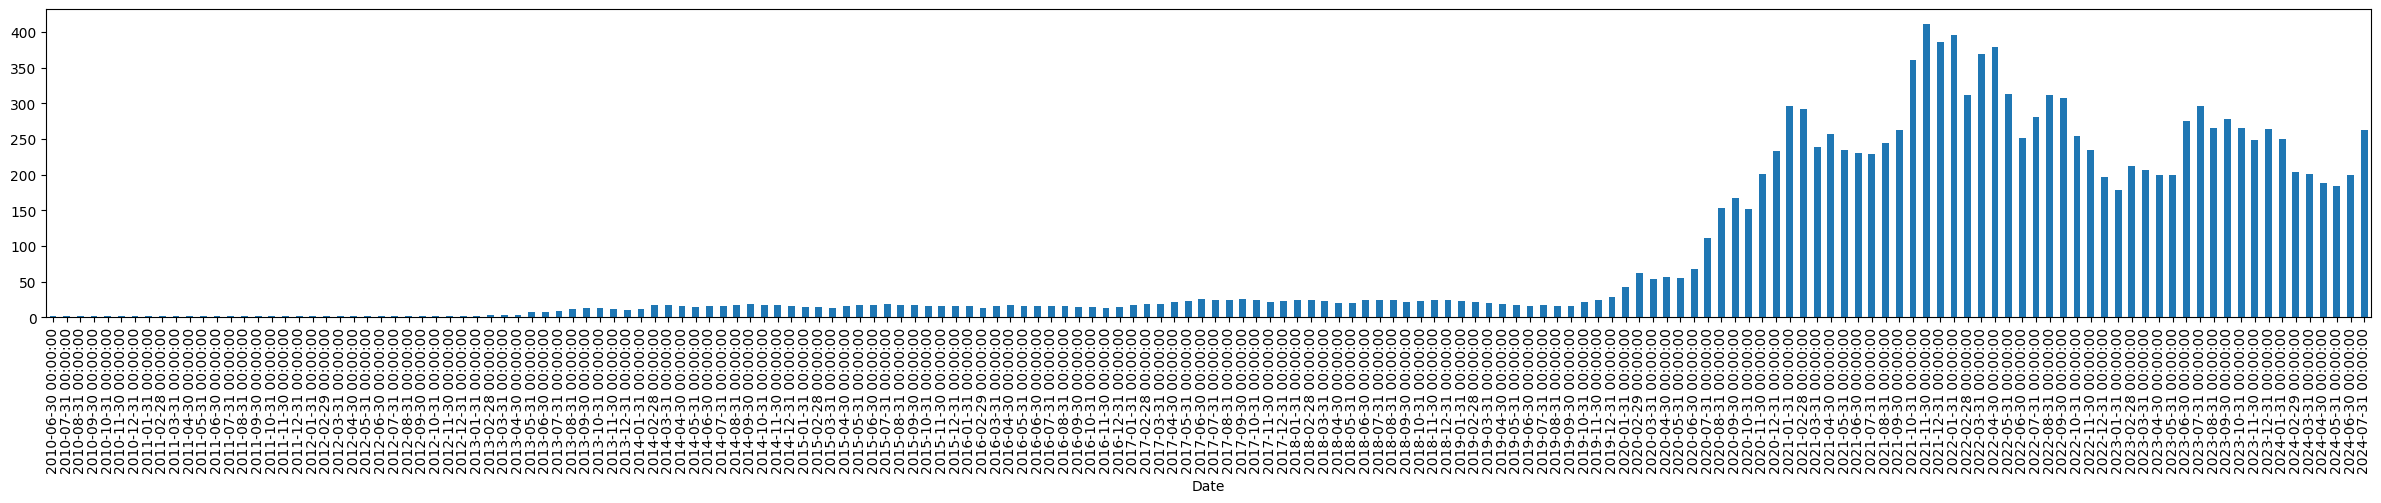

In [27]:
# month end projection for Open
df_tesla['Open'].resample(rule='M').max().plot(kind='bar', figsize=(30, 4))

## rolling

In [28]:
df_tesla['High'].rolling(10)

Rolling [window=10,center=False,axis=0,method=single]

In [29]:
df_tesla['High'].rolling(10).mean()

Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01           NaN
2010-07-02           NaN
2010-07-06           NaN
                 ...    
2024-07-22    259.852000
2024-07-23    258.867001
2024-07-24    254.707002
2024-07-25    250.207002
2024-07-26    247.251003
Name: High, Length: 3543, dtype: float64

In [32]:
df_tesla['Open: 30 days rolling'] = df_tesla['Open'].rolling(30).mean()
df_tesla.head(32)

,Open,High,Low,Close,Adj Close,Volume,Open: 30 days rolling
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,NaN
2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000,NaN
2010-07-09,1.172000,1.193333,1.103333,1.160000,1.160000,60759000,NaN
2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500,NaN


<Axes: xlabel='Date'>

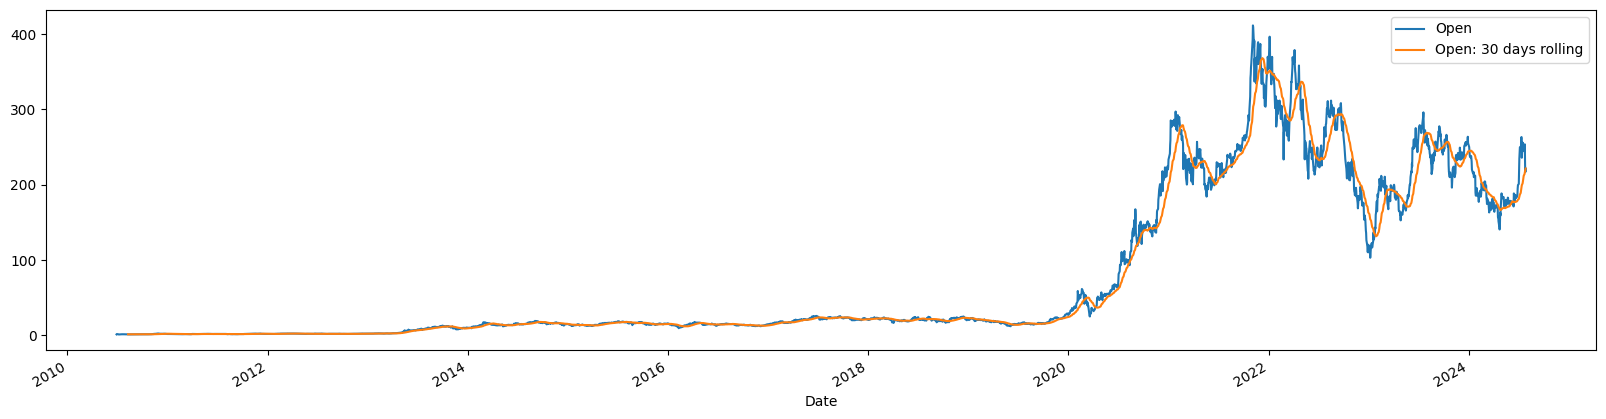

In [35]:
df_tesla[['Open', 'Open: 30 days rolling']].plot(figsize=(20, 5))